In [1]:
from random import gauss

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:

[gauss(0,1)+5 for i in range(1000)], [gauss(1,2)-5 for i in range(100)]

([5.034635203446363,
  3.144921095179227,
  4.768266314548564,
  3.8921865251077685,
  4.848520750369162,
  4.501498601581975,
  5.4216435073511615,
  5.638106966351177,
  5.253608202763544,
  6.680294619945569,
  5.574721105441237,
  4.919803647239021,
  6.200689891313505,
  7.411707400662351,
  4.879689855431823,
  5.722163048582414,
  5.034411531171412,
  5.7533415715621254,
  6.468705812177827,
  3.9930414596386754,
  4.80378205621272,
  5.54975715388955,
  8.155033603059499,
  4.633101885062502,
  4.202664512964982,
  4.836076553177478,
  3.7105676293074668,
  4.7849565496098325,
  5.07989519803194,
  3.4245751941838556,
  3.6819257360573125,
  6.140244275463338,
  4.901004748669026,
  5.760001565097552,
  5.51015448009958,
  6.871783241619858,
  5.45413399794041,
  5.321850799184559,
  4.9335962538542155,
  3.619705707553249,
  4.169448818417309,
  5.345000068504809,
  6.010730101335901,
  6.260003853527475,
  5.054002484786743,
  4.265918321835358,
  5.101359002286952,
  5.39986

In [3]:
bin_edges = np.linspace(-10,10,21)
bin_edges

array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

In [10]:
hist_1, bins = np.histogram([gauss(0,2)+1 for i in range(1000)], bins=bin_edges)
hist_2, bins = np.histogram([gauss(0,2)-1 for i in range(1000)], bins=bin_edges)

In [11]:
hist_1, hist_2,bins

(array([  0,   0,   0,   0,   3,   4,  14,  42,  86, 156, 206, 194, 140,
         89,  39,  19,   7,   1,   0,   0]),
 array([  0,   0,   0,   3,  19,  41,  91, 151, 199, 187, 152,  99,  44,
          9,   2,   2,   1,   0,   0,   0]),
 array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
          1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]))

<Axes: >

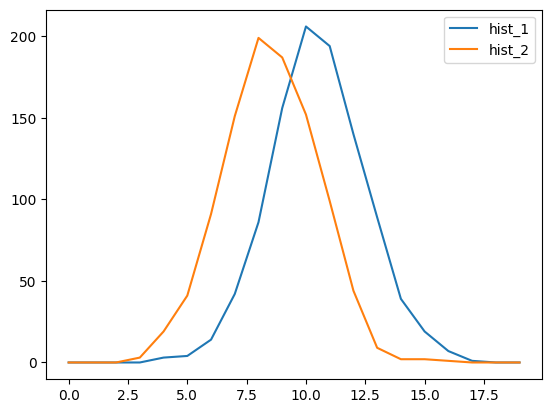

In [12]:
sim_data_df = pd.DataFrame({'hist_1':hist_1, 'hist_2':hist_2})
sim_data_df.plot()

In [1]:
import numpy as np
import pandas as pd
from random import gauss

from src.change_detector.change_detector import PDFChangeDetector
detector = PDFChangeDetector(a_memory=0.0)

first_interval, second_interval = 2000, 2000
first_shift, second_shift = 5, -5

bin_edges = np.linspace(-10,10,21)

state_array = np.empty(first_interval+second_interval, dtype='uint8')
alpha_series = np.empty(first_interval+second_interval, dtype='float64')
beta_series = np.empty(first_interval+second_interval, dtype='float64')

for i in range(first_interval):
    pdf, _ = np.histogram([gauss(0,2)+first_shift for i in range(1000)], bins=bin_edges)
    result, alpha, beta  = detector.detect_change(pd.Series(pdf))
    state_array[i] = result.value
    alpha_series[i] = alpha
    beta_series[i] = beta
    print(i, ":", result.name, "\n")

for i in range(first_interval, first_interval+second_interval):
    pdf, _ = np.histogram([gauss(0,2)+second_shift for i in range(1000)], bins=bin_edges)
    result, alpha, beta = detector.detect_change(pd.Series(pdf))
    state_array[i] = result.value
    alpha_series[i] = alpha
    beta_series[i] = beta
    print(i, ":", result.name, "\n")

First pdf taken as reference.
0 : IN_CONTROL 

PDF distance: 0.059560003529727276 current_order: 1
new alpha: None   new beta: None
geo_mean: 0.059560003529727276   complementary geo_mean: 0.9404399964702728
Only one distance estimator is available.
1 : IN_CONTROL 

PDF distance: 0.0893697539630119 current_order: 2
regular calc:  0.07295795269528776
log calc:  0.07295795269528776
regular calc:  0.9254150989522208
log calc:  0.9254150989522208
new alpha: 22.921717500608718   new beta: 284.9021131755898
geo_mean: 0.07295795269528776   complementary geo_mean: 0.9254150989522208
current u1: 0.0892511366901085
min u1: 0.0892511366901085   min u2: 0.1062490260469979   min u3: 0.12579786511848146
2 : IN_CONTROL 

PDF distance: 0.04613583996406959 current_order: 3
regular calc:  0.06262213974691114
log calc:  0.06262213974691114
regular calc:  0.9348025701949529
log calc:  0.9348025701949529
new alpha: 12.658269230503382   new beta: 181.99461790560082
geo_mean: 0.06262213974691114   complement

<Axes: >

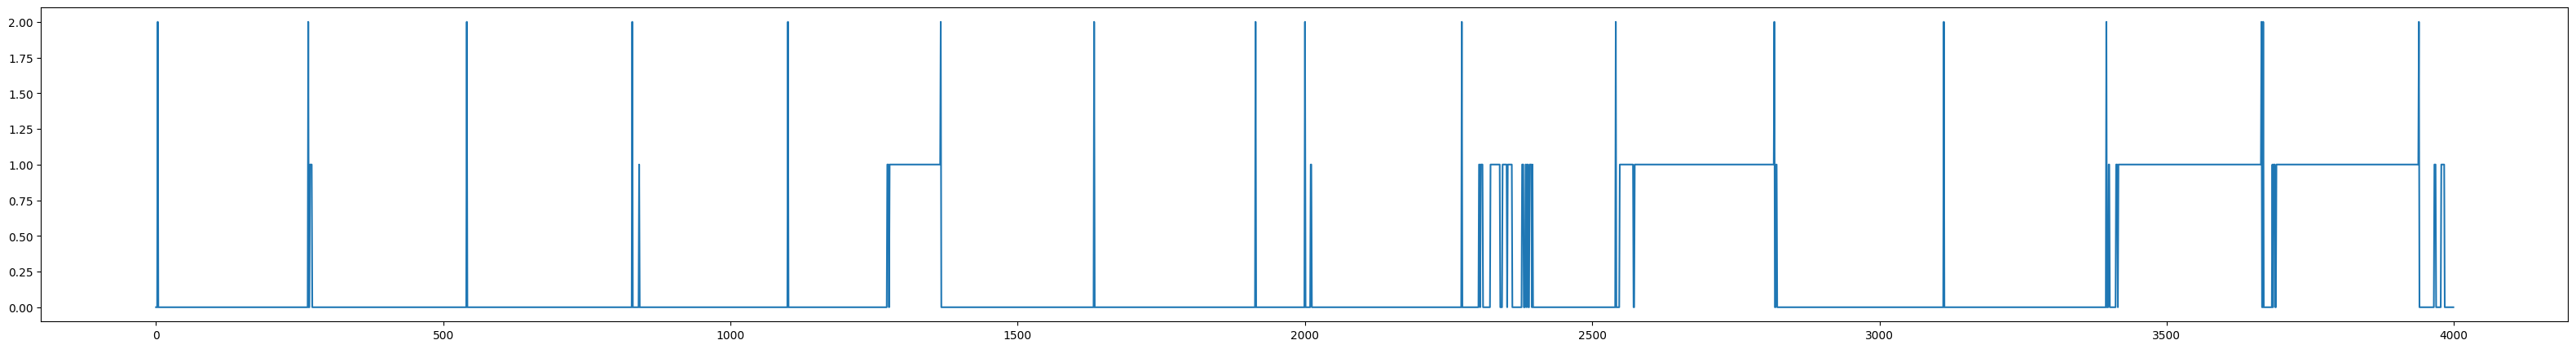

In [4]:
pd.Series(state_array).plot(figsize=(40,5))

<Axes: >

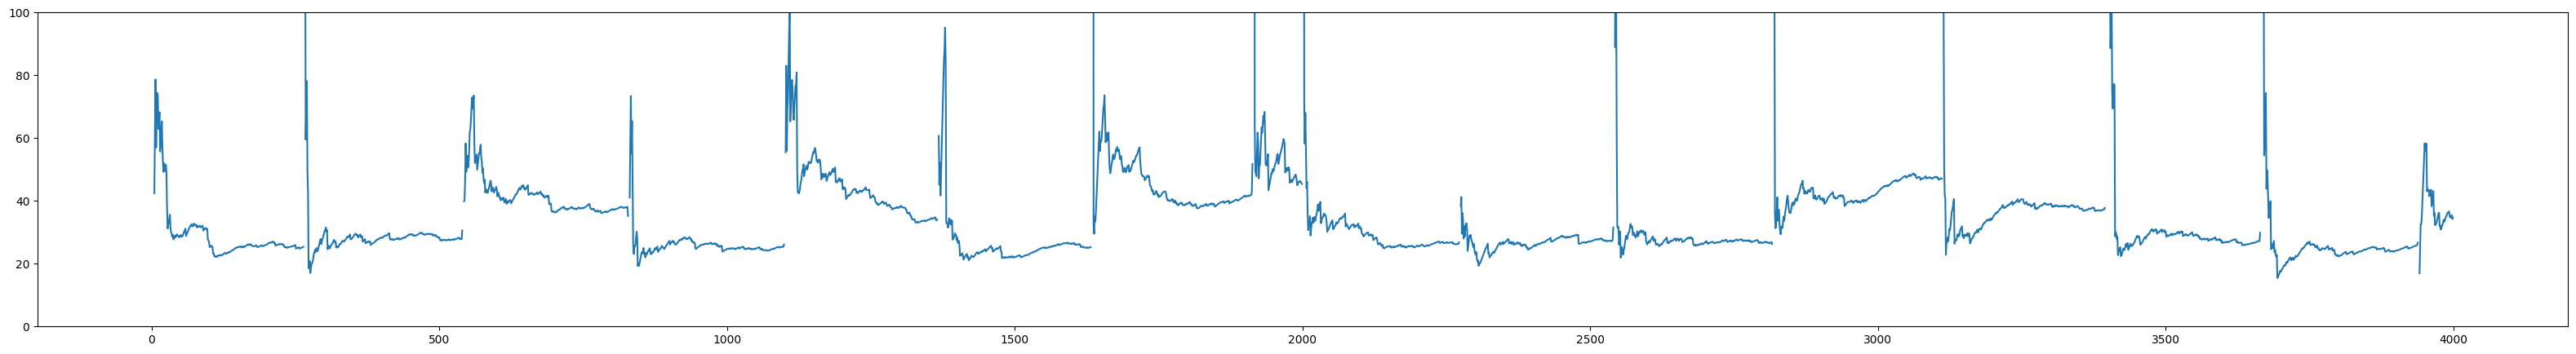

In [7]:
pd.Series(alpha_series).plot(figsize=(40,5), ylim=(0,100))

<Axes: >

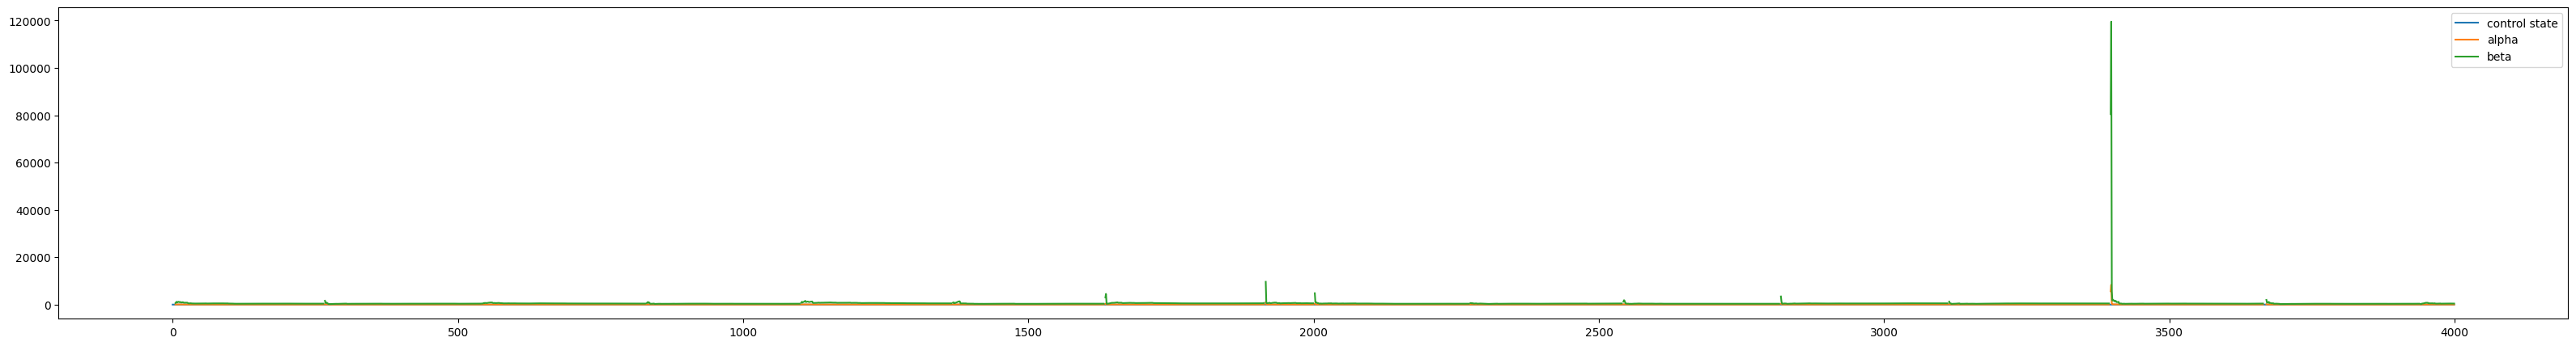

In [3]:
pd.DataFrame({'control state': state_array, 'alpha': alpha_series, 'beta': beta_series}).plot(figsize=(40,5))

In [7]:
import numpy as np
import pandas as pd
from random import gauss

from tqdm import tqdm

from src.change_detector.change_detector import PDFChangeDetector
detector = PDFChangeDetector(a_memory=0.0)

first_interval, second_interval = 2000, 2000
first_shift, second_shift = 1, -1

bin_edges = np.linspace(-10,10,21)

state_array = np.empty(first_interval+second_interval, dtype='uint8')
alpha_series = np.empty(first_interval+second_interval, dtype='float64')
beta_series = np.empty(first_interval+second_interval, dtype='float64')

for i in tqdm(range(first_interval)):
    pdf, _ = np.histogram([gauss(0,2)+first_shift for i in range(1000)], bins=bin_edges)
    result, alpha, beta  = detector.detect_change(pd.Series(pdf))
    state_array[i] = result.value
    alpha_series[i] = alpha
    beta_series[i] = beta
    # print(i, ":", result.name, "\n")

for i in tqdm(range(first_interval, first_interval+second_interval)):
    pdf, _ = np.histogram([gauss(0,2)+second_shift for i in range(1000)], bins=bin_edges)
    result, alpha, beta = detector.detect_change(pd.Series(pdf))
    state_array[i] = result.value
    alpha_series[i] = alpha
    beta_series[i] = beta
    # print(i, ":", result.name, "\n")

100%|██████████| 2000/2000 [00:05<00:00, 385.97it/s]


<Axes: >

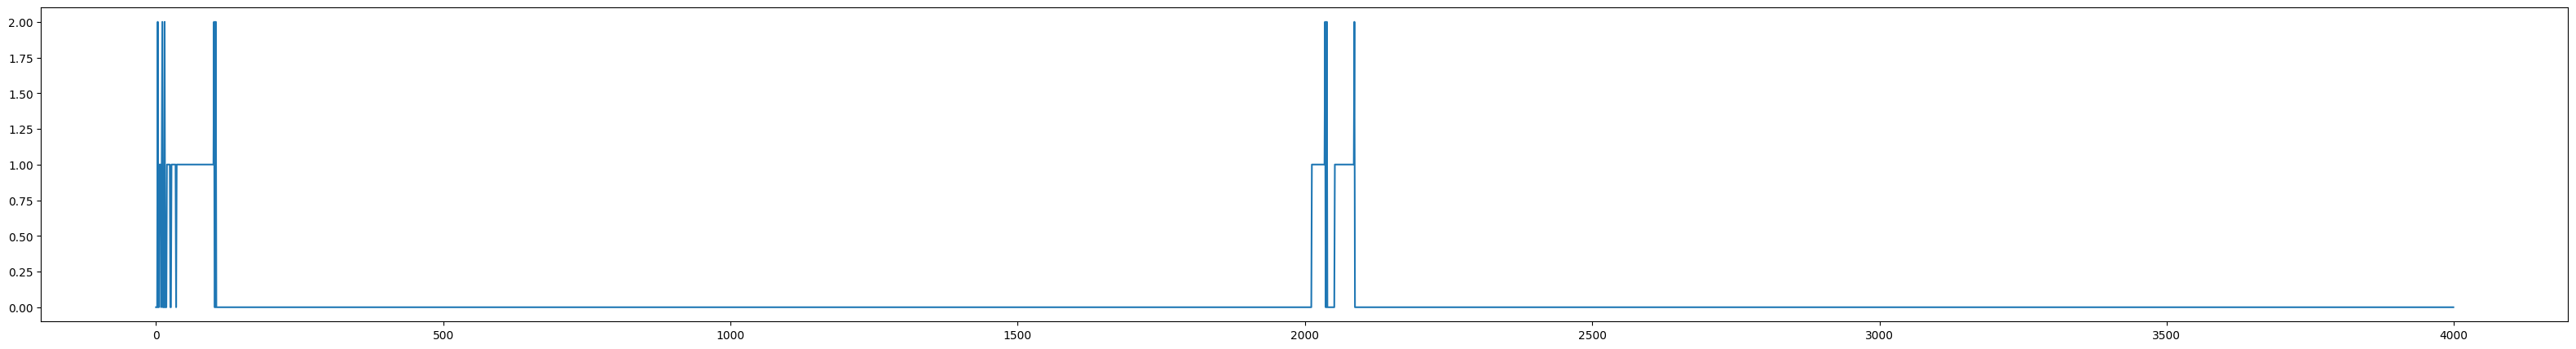

In [8]:
pd.Series(state_array).plot(figsize=(40,5))

<Axes: >

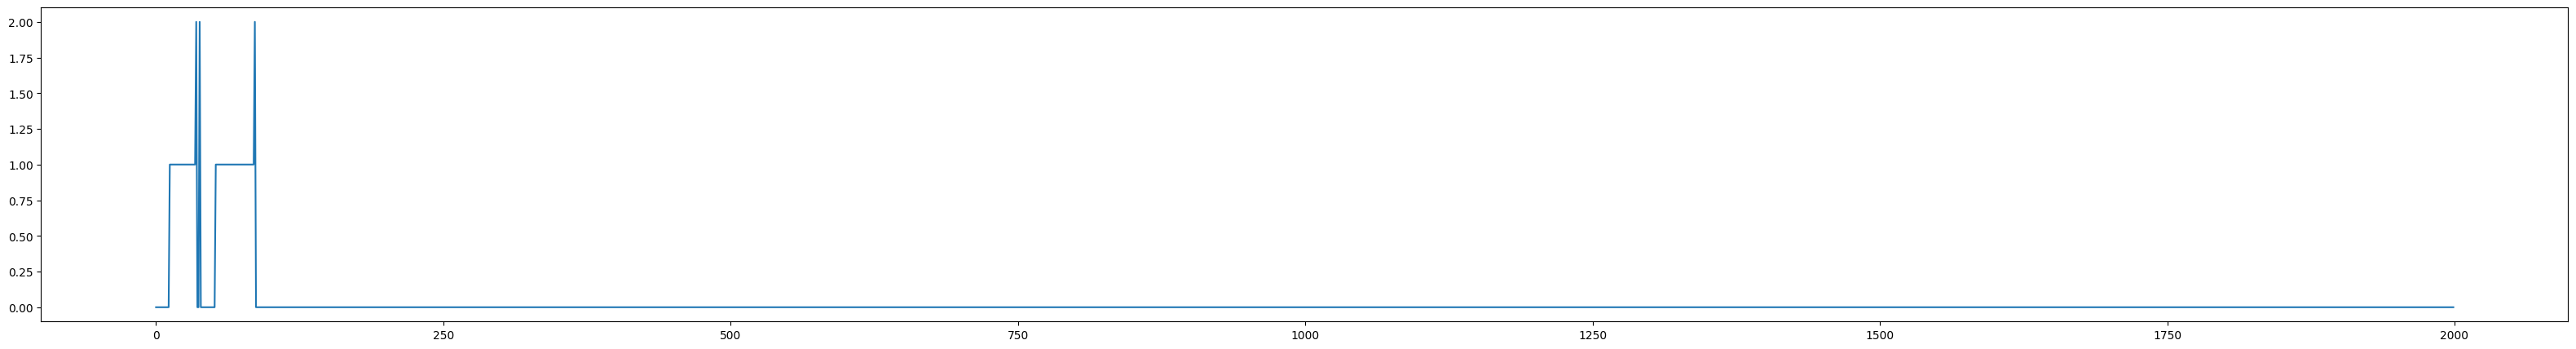

In [9]:
pd.Series(state_array[-second_interval:]).plot(figsize=(40,5))

In [1]:
import numpy as np
import pandas as pd
from random import gauss

from tqdm import tqdm

from src.change_detector.change_detector import PDFChangeDetector
detector = PDFChangeDetector(a_memory=0.0)

first_interval, second_interval = 200000, 2000
first_shift, second_shift = 1, -1

bin_edges = np.linspace(-10,10,21)

state_array = np.empty(first_interval+second_interval, dtype='uint8')
alpha_series = np.empty(first_interval+second_interval, dtype='float64')
beta_series = np.empty(first_interval+second_interval, dtype='float64')

for i in tqdm(range(first_interval)):
    pdf, _ = np.histogram([gauss(0,2)+first_shift for i in range(1000)], bins=bin_edges)
    result, alpha, beta  = detector.detect_change(pd.Series(pdf))
    state_array[i] = result.value
    alpha_series[i] = alpha
    beta_series[i] = beta
    # print(i, ":", result.name, "\n")

for i in tqdm(range(first_interval, first_interval+second_interval)):
    pdf, _ = np.histogram([gauss(0,2)+second_shift for i in range(1000)], bins=bin_edges)
    result, alpha, beta = detector.detect_change(pd.Series(pdf))
    state_array[i] = result.value
    alpha_series[i] = alpha
    beta_series[i] = beta
    # print(i, ":", result.name, "\n")

100%|██████████| 2000/2000 [00:05<00:00, 389.25it/s]


<Axes: >

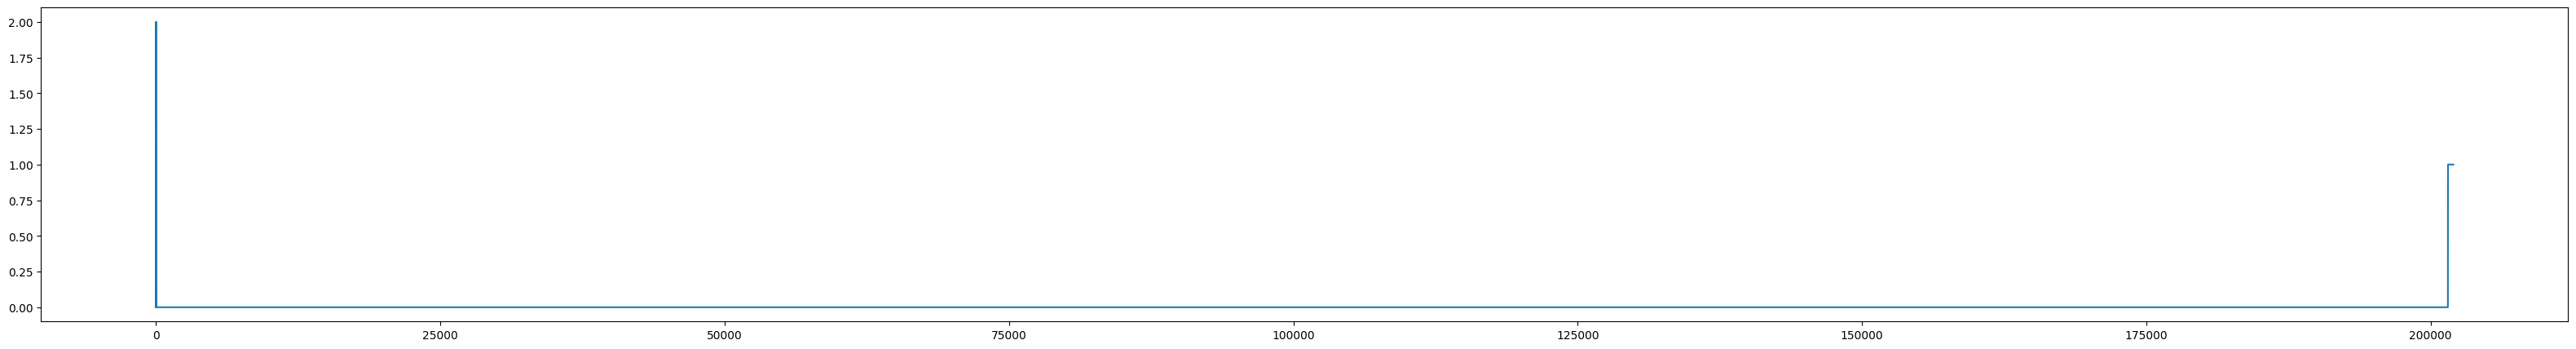

In [2]:
pd.Series(state_array).plot(figsize=(40,5))

<Axes: >

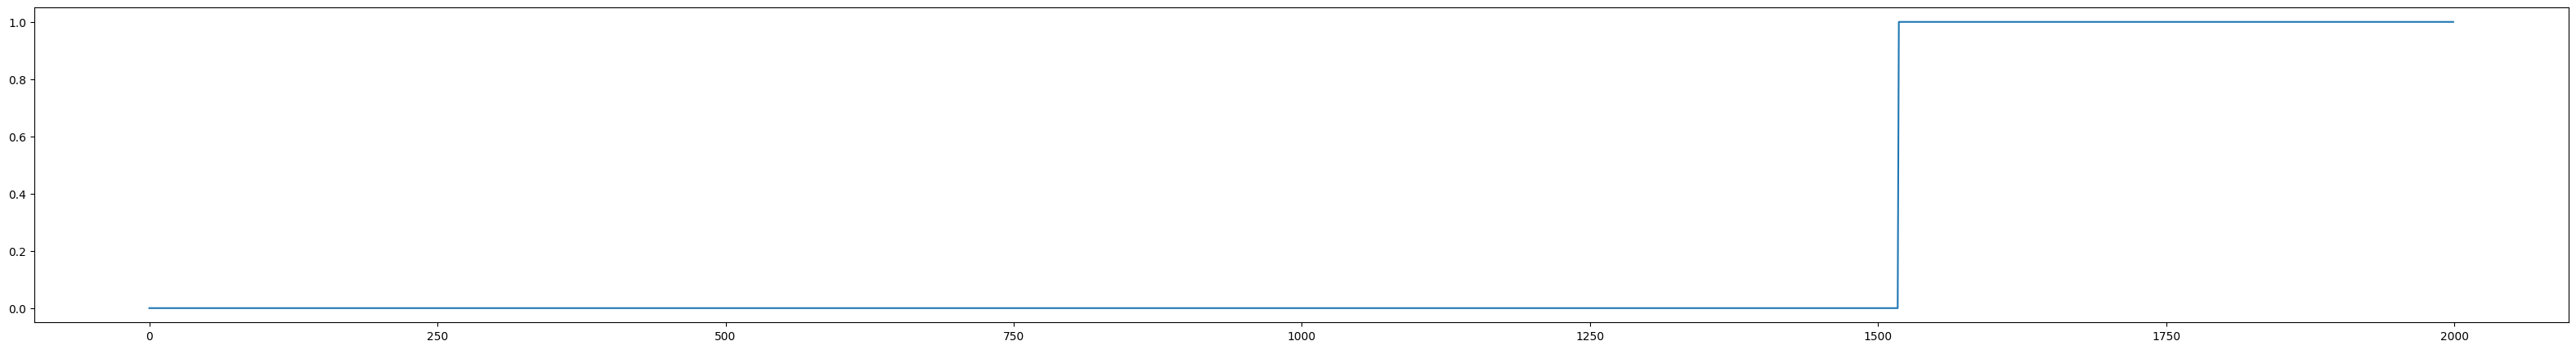

In [4]:
pd.Series(state_array[-second_interval:]).plot(figsize=(40,5))

<Axes: >

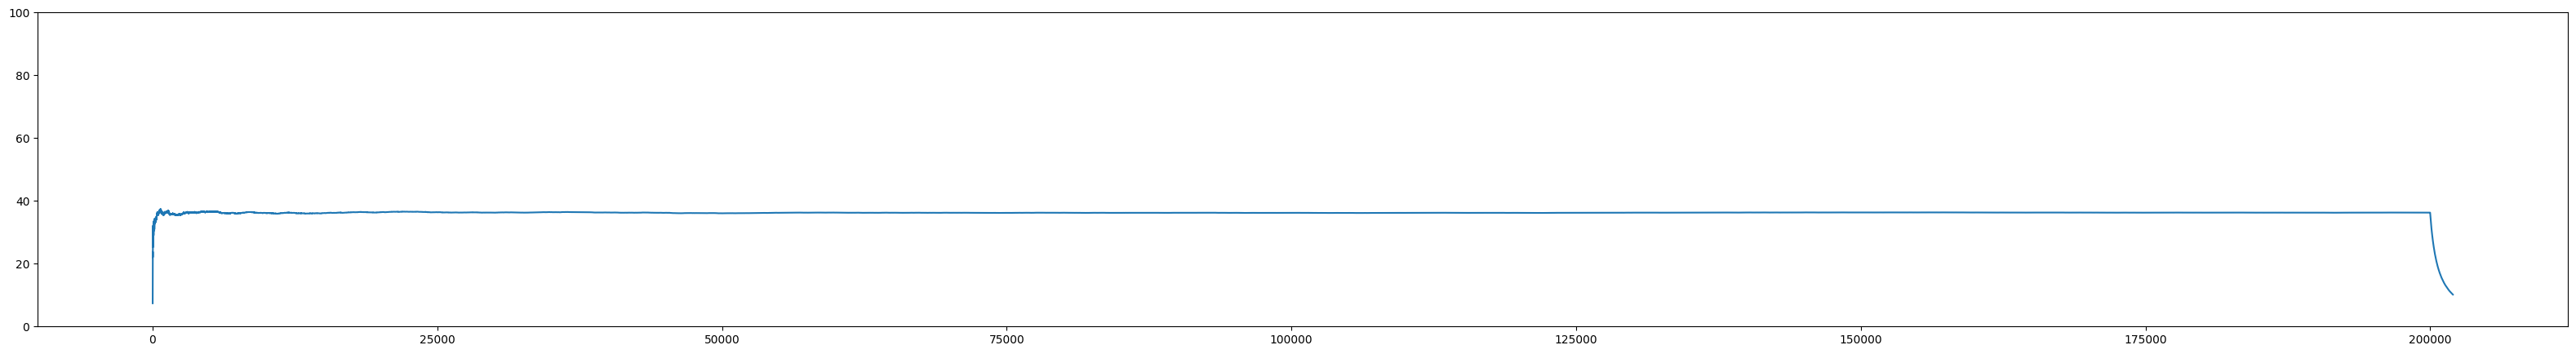

In [5]:
pd.Series(alpha_series).plot(figsize=(40,5), ylim=(0,100))

<Axes: >

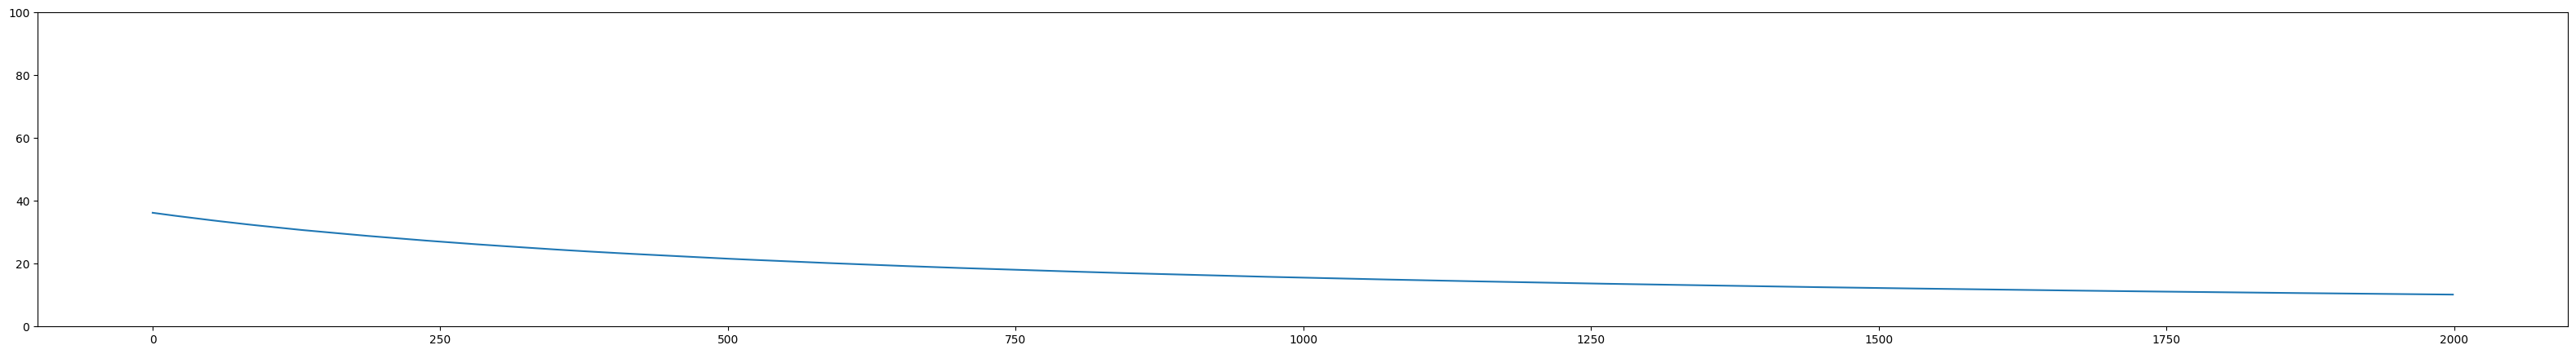

In [6]:
pd.Series(alpha_series[-second_interval:]).plot(figsize=(40,5), ylim=(0,100))

<Axes: >

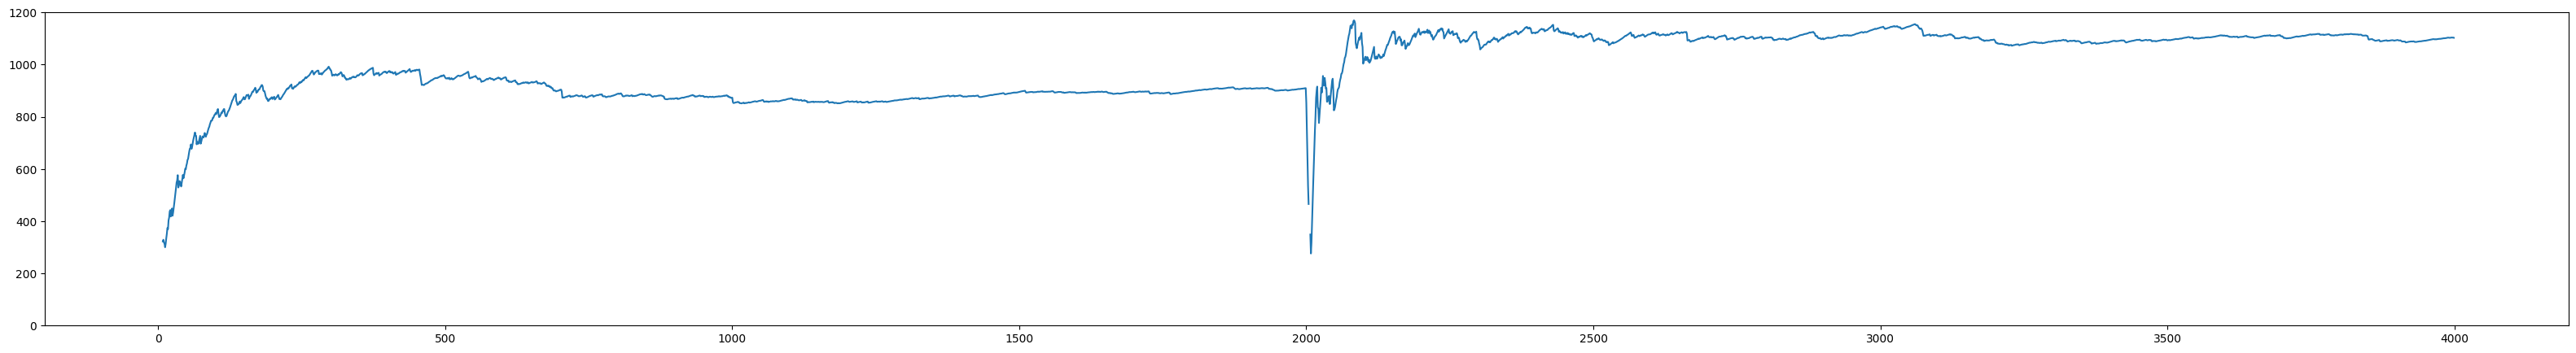

In [15]:
pd.Series(beta_series).plot(figsize=(40,5), ylim=(0,1200))

<Axes: >

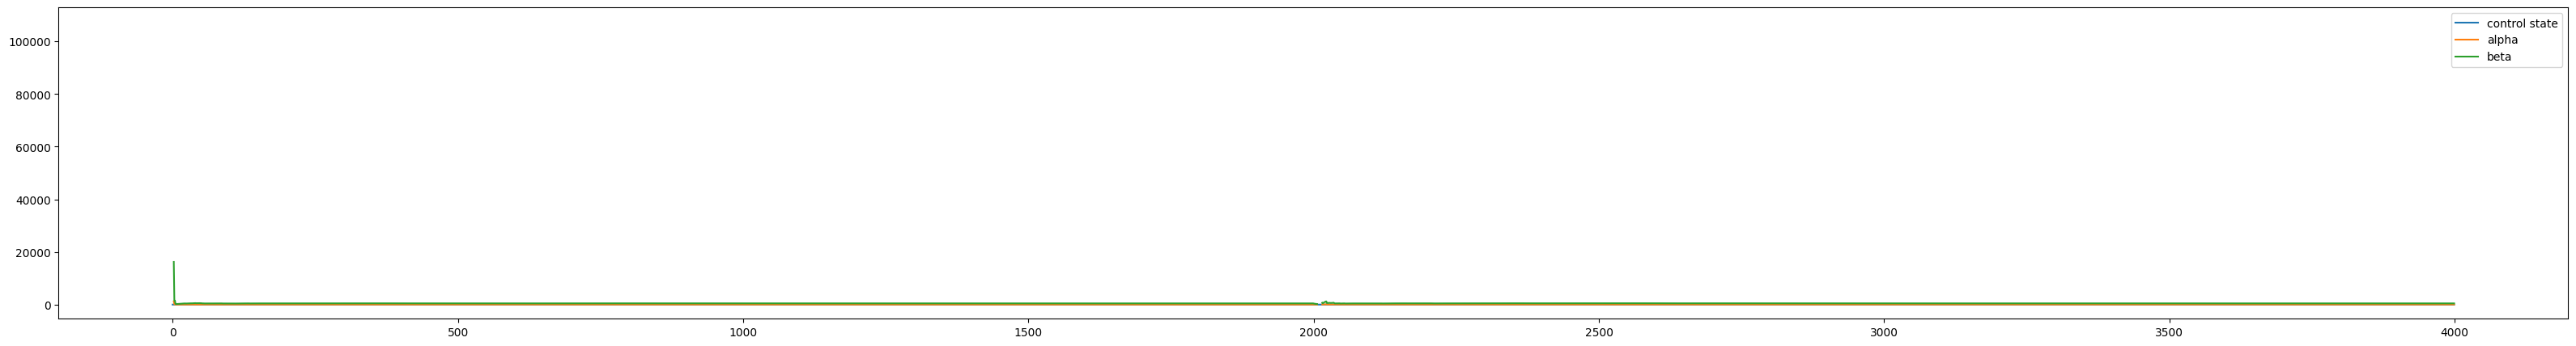

In [8]:
pd.DataFrame({'control state': state_array, 'alpha': alpha_series, 'beta': beta_series}).plot(figsize=(40,5))